In [13]:
import torch
import numpy as np
import pandas as pd
from torch.autograd import Variable
import matplotlib.pyplot as plt
import torch.nn as nn

# 一元线性回归

In [5]:
x_train = np.array([[3.3],[4.4],[5.5],[6.71],[6.93],[4.168],[9.779],[6.128],[7.59],[2.167],[7.042],[10.791],[5.313],[7.997],[3.1]],dtype=np.float32)
y_train = np.array([[1.7],[2.76],[2.09],[3.19],[1.694],[1.573],[3.366],[2.596],[2.53],[1.221],[2.827],[3.465],[1.65],[2.904],[1.3]],dtype=np.float32)

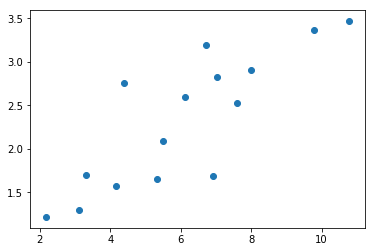

In [26]:
plt.scatter(x_train,y_train)
plt.show()

In [8]:
#利用pytorch拟合
x_train = torch.from_numpy(x_train)
y_train = torch.from_numpy(y_train)

In [18]:
#定义模型
class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression,self).__init__()
        self.linear = nn.Linear(1,1) #input and output is 1 dimension
        
    def forward(self,x):
        out = self.linear(x)
        return out
model = LinearRegression()
#定义函数
def linear_model(x):
    return x * w + b

In [19]:
#定义损失函数和优化函数
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=1e-3)

In [23]:
#训练模型
num_epochs = 1000
for epoch in range(num_epochs):
    inputs = Variable(x_train)
    target = Variable(y_train)
    #forward
    out = model(inputs)
    loss = criterion(out,target)
    #backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 100 == 0:
        print('Epoch[{}/{}],loss:{:.6f}'.format(epoch+1,num_epochs,loss.data[0]))

Epoch[100/1000],loss:0.180741
Epoch[200/1000],loss:0.180172
Epoch[300/1000],loss:0.179631
Epoch[400/1000],loss:0.179117
Epoch[500/1000],loss:0.178629
Epoch[600/1000],loss:0.178165
Epoch[700/1000],loss:0.177725
Epoch[800/1000],loss:0.177307
Epoch[900/1000],loss:0.176909
Epoch[1000/1000],loss:0.176532


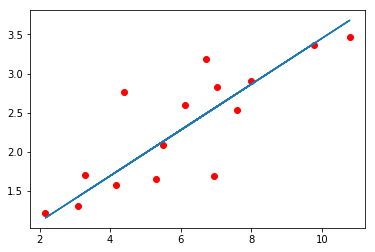

In [24]:
#预测结果
model.eval()#将模型变成测试模式
predict = model(Variable(x_train))
predict = predict.data.numpy()
plt.plot(x_train.numpy(),y_train.numpy(),'ro',label='Original data')
plt.plot(x_train.numpy(),predict,label='Fitting Line')
plt.show()

# 多项式回归

In [27]:
def make_featires(x):
    """
    Builds features i.e. a matrix with cloumns [x,x^2,x^3].
    """
    x = x.unsqueeze(1)
    return torch.cat([x ** i for i in range(1,4)],1)

In [28]:
W_target = torch.FloatTensor([0.5,3,2.4]).unsqueeze(1)
b_target = torch.FloatTensor([0.9])

In [29]:
def f(x):
    """Approximated function."""
    return x.mm(W_target) + b_target[0]

In [30]:
#采样数据点，随机生成一些数
def get_batch(batch_size=32):
    """Builds a batch i.e. (x,f(x)) pair."""
    random = torch.randn(batch_size)
    x = make_featires(random)
    y = f(x)
    return Variable(x),Variable(y)

In [32]:
#定义多项式模型
class poly_model(nn.Module):
    def __init__(self):
        super(poly_model,self).__init__()
        self.poly = nn.Linear(3,1)
    def forward(self,x):
        out = self.poly(x)
        return out
if torch.cuda.is_available():
    model = poly_model().cuda()
else:
    model = poly_model()

In [33]:
#定义损失函数和优化函数
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=1e-3)

In [35]:
#训练模型
epoch = 0
while True:
    #get data
    batch_x,batch_y = get_batch()
    #forward pass
    output = model(batch_x)
    loss = criterion(output,batch_y)
    print_loss = loss.data[0]
    #Reset gradients
    optimizer.zero_grad()
    #backward pass
    loss.backward()
    #update parameters
    optimizer.step()
    epoch += 1
    if print_loss < 1e-3:
        print(print_loss)
        plt.plot()
        break

0.0009777620434761047
